# Start Analysing the Capstone Project DataSet.

### Import relevant  modules for analysing the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Lets extract out all datafiles from CSV to pandas dateframe so that we can analyze the data.

In [2]:
orders_df = pd.read_csv('C:\\Users\\rchauhan\\Desktop\\Springboard Materials\\Capstone Project Data\\orders.csv')
orders_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [3]:
department_df = pd.read_csv('C:\\Users\\rchauhan\\Desktop\\Springboard Materials\\Capstone Project Data\\departments.csv')
department_df.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [4]:
product_df = pd.read_csv('C:\\Users\\rchauhan\\Desktop\\Springboard Materials\\Capstone Project Data\\products.csv')
product_df.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [5]:
order_product_prior_df = pd.read_csv(r'C:\Users\rchauhan\Desktop\Springboard Materials\Capstone Project Data\order_products__prior.csv')
order_product_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [6]:
order_product_train_df = pd.read_csv(r'C:\Users\rchauhan\Desktop\Springboard Materials\Capstone Project Data\order_products__train.csv')


In [7]:
aisles_df = pd.read_csv(r'C:\Users\rchauhan\Desktop\Springboard Materials\Capstone Project Data\aisles.csv')
aisles_df.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


### Lets do Prelimanary analysis of Orders Data.

In [10]:
#count user_ids for different evaluation set
count_eval_set_user = orders_df.groupby('eval_set').user_id.nunique().reset_index()
count_eval_set_user.columns = ['Eval_Set', 'Count_User_ID']
count_eval_set_user

,Eval_Set,Count_User_ID
0,prior,206209
1,test,75000
2,train,131209


In [11]:
#count order_ids for different evaluation set
count_eval_set_order = orders_df.groupby('eval_set').order_id.nunique().reset_index()
count_eval_set_order.columns = ['Eval_Set', 'Count_Orders']
count_eval_set_order

,Eval_Set,Count_Orders
0,prior,3214874
1,test,75000
2,train,131209


*** From above result we found out that there are close to 420 Thousands Users and 3.5 Millions Orders information for those users ***

### Lets cleanup the data first before analyzing. 

In [15]:
#remove unwanted any extra blank spaces in the department field
department_df['department'] = department_df['department'].str.strip()

In [16]:
#remove any Null values in the department label
department_df.dropna(axis=0,how='any',subset=['department']).head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [17]:
#remove unwanted any extra blank spaces in the product field
product_df['product_name'] = product_df['product_name'].str.strip()

In [18]:
#remove any Null values in the product label
product_df.dropna(axis=0,how='any',subset=['product_name']).head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


#### Checking if any more cleanup is required.

In [20]:
product_df[product_df['product_name'].isnull()].head()

,product_id,product_name,aisle_id,department_id


In [21]:
department_df[department_df['department'].isnull()]

,department_id,department


### Now we have done our prelimanary observation and data cleaning lets analyze the data and answer few intresting questions. ###

*** 1. What is the odering trend of the users based on different day of week? ***

*** 2. What is the odering trend of the users based on different hour of the day? *** 

*** 3. Find out summary of orders in different departments ? ***

*** 4. How many products are re-ordered from different department? ***

*** 5. What is the trend of re-odering the products in different day of the week? ***

*** 6. What is the trend of re-odering the products in different in Morning, Afternnon, Eveining and Night? ***

*** 7. Find which day of the week alcohol was bought the most. ***

*** 8. Which day of the week and what hour of the day we see more number of orders than others. ***

*** 9. Find out Frequency distribution of days since prior order was made. ***







In [22]:
def range_of_hr(var1):
    if (var1 >= 4) & (var1 < 12):
        a = 'Morning'
    elif (var1 >= 12) & (var1 < 17):
        a = 'Afternoon'
    elif (var1 >= 17) & (var1 < 22):
        a = 'Evening'
    else:
        a = 'Night'
    return a  

In [23]:
def dow(val):
    if (val == 0):
        d = 'Sunday'
    elif (val == 1):
        d = 'Monday'
    elif (val == 2):
        d = 'Tuesday'    
    elif (val == 3):
        d = 'Wednesday'
    elif (val == 4):
        d = 'Thursday' 
    elif (val == 5):
        d = 'Friday'
    elif (val == 6):
        d = 'Saturday'  
    return d       

In [24]:
orders_df['range_of_hr'] = orders_df.order_hour_of_day.apply(range_of_hr)
orders_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,range_of_hr
0,2539329,1,prior,1,2,8,NaN,Morning
1,2398795,1,prior,2,3,7,15.0,Morning
2,473747,1,prior,3,3,12,21.0,Afternoon
3,2254736,1,prior,4,4,7,29.0,Morning
4,431534,1,prior,5,4,15,28.0,Afternoon


In [25]:
orders_df['weekday'] = orders_df.order_dow.apply(dow)
orders_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,range_of_hr,weekday
0,2539329,1,prior,1,2,8,NaN,Morning,Tuesday
1,2398795,1,prior,2,3,7,15.0,Morning,Wednesday
2,473747,1,prior,3,3,12,21.0,Afternoon,Wednesday
3,2254736,1,prior,4,4,7,29.0,Morning,Thursday
4,431534,1,prior,5,4,15,28.0,Afternoon,Thursday


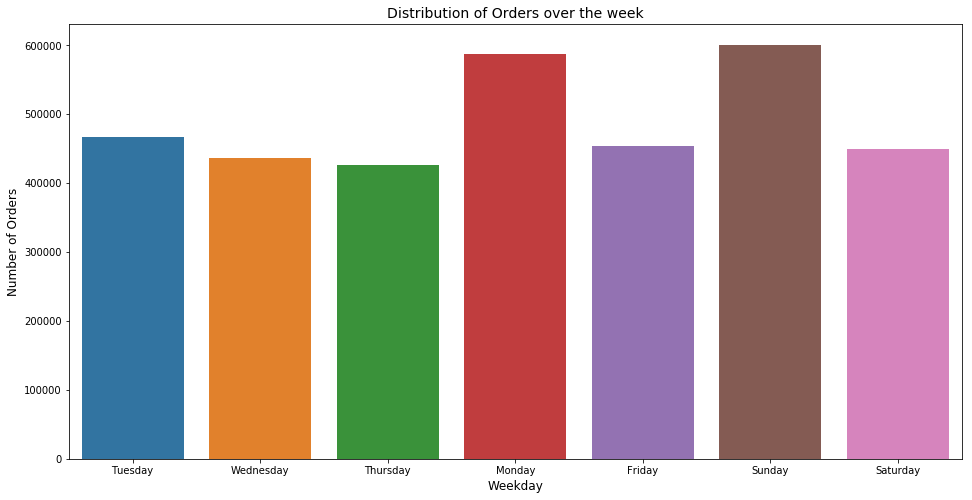

In [26]:
plt.figure(figsize = (16,8))
sns.countplot(x='weekday',data=orders_df)
plt.xlabel('Weekday',fontsize = 12)
plt.ylabel('Number of Orders',fontsize = 12)
plt.title('Distribution of Orders over the week',fontsize = 14)
plt.show()

*** We see that Monday and Sunday are most number of oders are done ***

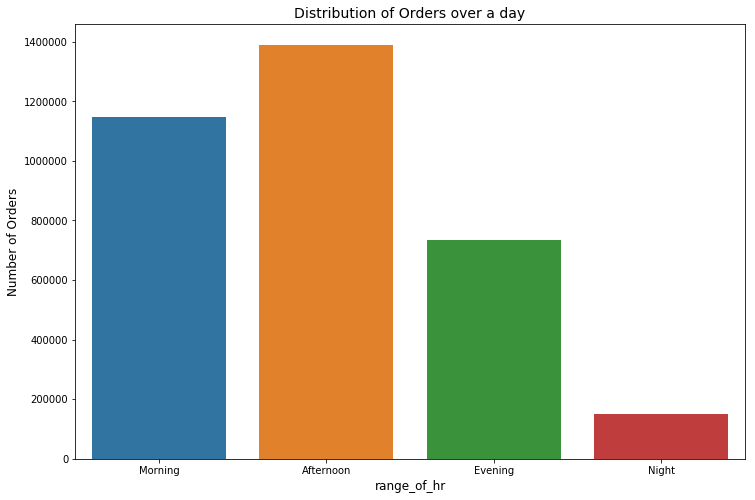

In [27]:
plt.figure(figsize = (12,8))
sns.countplot(x='range_of_hr',data=orders_df)
plt.xlabel('range_of_hr',fontsize = 12)
plt.ylabel('Number of Orders',fontsize = 12)
plt.title('Distribution of Orders over a day',fontsize = 14)
plt.show()

*** We see that Afternoon is the time when most number of oders were made. ***

In [30]:
order_product_join_train = pd.merge(orders_df,order_product_train_df,how='inner',on='order_id')
order_product_join_train.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,range_of_hr,weekday,product_id,add_to_cart_order,reordered
0,1187899,1,train,11,4,8,14.0,Morning,Thursday,196,1,1
1,1187899,1,train,11,4,8,14.0,Morning,Thursday,25133,2,1
2,1187899,1,train,11,4,8,14.0,Morning,Thursday,38928,3,1
3,1187899,1,train,11,4,8,14.0,Morning,Thursday,26405,4,1
4,1187899,1,train,11,4,8,14.0,Morning,Thursday,39657,5,1


In [31]:
order_product = pd.merge(order_product_join_train,product_df,how='inner',on='product_id')
order_product_department = pd.merge(order_product,department_df,how='inner',on='department_id')
order_product_department_aisle = pd.merge(order_product_department,aisles_df,how='inner',on='aisle_id')
order_product_department_aisle.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,range_of_hr,weekday,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,aisle
0,1187899,1,train,11,4,8,14.0,Morning,Thursday,196,1,1,Soda,77,7,beverages,soft drinks
1,2757217,67,train,25,0,11,5.0,Morning,Sunday,196,1,1,Soda,77,7,beverages,soft drinks
2,632715,676,train,12,0,13,26.0,Afternoon,Sunday,196,2,1,Soda,77,7,beverages,soft drinks
3,1167274,760,train,5,4,10,8.0,Morning,Thursday,196,2,1,Soda,77,7,beverages,soft drinks
4,3347074,804,train,16,3,21,5.0,Evening,Wednesday,196,4,0,Soda,77,7,beverages,soft drinks


In [32]:
analysis_df = order_product_department_aisle[['user_id','order_id','product_name','department','aisle','order_dow','order_hour_of_day','days_since_prior_order','add_to_cart_order','reordered','range_of_hr','weekday']]


In [34]:
df = analysis_df.groupby('department').count()['order_id'].reset_index()
df.columns = ['Department','Total_Orders']
df.sort_values(by='Total_Orders',ascending=False)

,Department,Total_Orders
19,produce,409087
7,dairy eggs,217051
20,snacks,118862
3,beverages,114046
10,frozen,100426
16,pantry,81242
2,bakery,48394
6,canned goods,46799
8,deli,44291
9,dry goods pasta,38713


*** So we see that Produce is the department where maximum orders were made. ***

In [35]:
df = analysis_df.groupby('department')['reordered'].sum().reset_index()
df.columns = ['Department','Re-Ordered_Count']
df.sort_values(by='Re-Ordered_Count',ascending=False)


,Department,Re-Ordered_Count
19,produce,271886
7,dairy eggs,146502
3,beverages,75060
20,snacks,69102
10,frozen,56168
2,bakery,30692
16,pantry,29498
8,deli,27367
6,canned goods,22782
9,dry goods pasta,18885


*** Again Produce department is the place where maximum orders were made. It make sence because that is the department where most orders were made. No suprises there. ***

In [176]:
df = analysis_df.groupby('weekday')['reordered'].sum().reset_index()
df.sort_values(by='reordered',ascending=False)

,weekday,reordered
3,Sunday,197534
1,Monday,123376
2,Saturday,123173
0,Friday,107239
5,Tuesday,94469
4,Thursday,92454
6,Wednesday,90579


*** This is the reodering trend for the weekdays ***

In [36]:
df = analysis_df.groupby('range_of_hr')['reordered'].sum().reset_index()
df.sort_values(by='reordered',ascending=False)

,range_of_hr,reordered
0,Afternoon,336662
2,Morning,271813
1,Evening,182098
3,Night,38251


*** This is the reodering trend for the weekdays ***

In [37]:
df_alcohol = analysis_df[analysis_df['department']=='alcohol']
a = df_alcohol.groupby('weekday')['product_name'].count().reset_index()
a.columns = ['Weekday','Alcohol_Product_Count']
a.sort_values(by='Alcohol_Product_Count',ascending=False)

,Weekday,Alcohol_Product_Count
0,Friday,1036
4,Thursday,958
6,Wednesday,834
2,Saturday,765
3,Sunday,713
5,Tuesday,677
1,Monday,615


*** So most alcohol products were bought on Friday. It make sence as Saturday & Sunday are generally holiday for most people ***

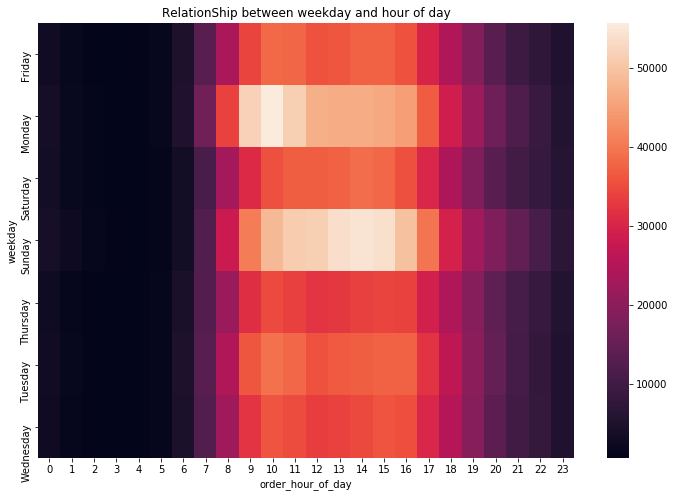

In [206]:
plt.figure(figsize = (12,8))
c = orders_df.groupby(['weekday','order_hour_of_day'])['order_id'].count().reset_index()
c = c.pivot('weekday','order_hour_of_day','order_id')
sns.heatmap(c)
plt.title('RelationShip between weekday and hour of day')
plt.show()

*** With this heat map we can clearly see that Monday morning and Sunady Afternoon are the most number of oders made ***

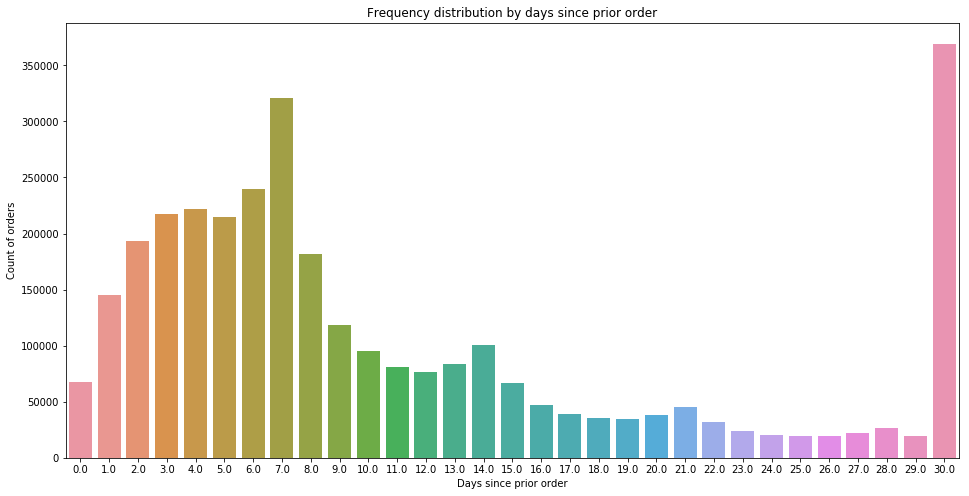

In [213]:
plt.figure(figsize = (16,8))
sns.countplot(x="days_since_prior_order", data=orders_df)
plt.ylabel('Count of orders')
plt.xlabel('Days since prior order')
plt.title("Frequency distribution by days since prior order")
plt.show()

*** We can see that after every 7 days or after every 30 days we re-oder the same products ***

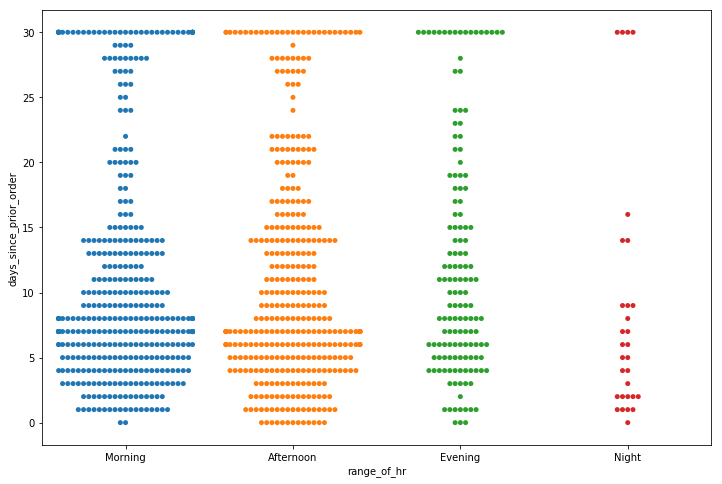

In [208]:
plt.figure(figsize = (12,8))
plt.figure(figsize = (12,8))
sns.swarmplot(x='range_of_hr',y='days_since_prior_order',data=orders_df.head(1000))
#plt.ylabel('Number of orders in Thousands')
plt.show()

*** Again we see from the swarm plot above for any time of the day, reoder is maximum after 30 days. There is an intresting trend we can see in the re-odering after 7 days. It is reducing from Morning to Night ***